# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ketchikan
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | qarazhal
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | sinjai
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | bargara
City not found. Skipping...
Processing Record 15 of Set 1 | fuensalida
Processing Record 16 of Set 1 | jiaojiang
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | haiku-pauwela
Processing Record 20 of Set 1 | kamina
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Proc

Processing Record 39 of Set 4 | yermakovskoye
Processing Record 40 of Set 4 | afaahiti
Processing Record 41 of Set 4 | marquette
Processing Record 42 of Set 4 | fada
Processing Record 43 of Set 4 | san luis
Processing Record 44 of Set 4 | tobelo
Processing Record 45 of Set 4 | mendoza
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | khanpur
Processing Record 48 of Set 4 | huron
Processing Record 49 of Set 4 | ha'il
Processing Record 0 of Set 5 | polyarnyy
Processing Record 1 of Set 5 | vilyuysk
Processing Record 2 of Set 5 | kill devil hills
Processing Record 3 of Set 5 | stanley
Processing Record 4 of Set 5 | slave lake
Processing Record 5 of Set 5 | tibu
Processing Record 6 of Set 5 | spring creek
Processing Record 7 of Set 5 | qinzhou
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | candolim
Processing Record 10 of Set 5 | jalai nur
Processing Record 11 of Set 5 | shakawe
Processing Record 12 of Set 5 | corfu
Processing Record 13 of Se

Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 32 of Set 8 | selfoss
Processing Record 33 of Set 8 | khandyga
Processing Record 34 of Set 8 | faya-largeau
Processing Record 35 of Set 8 | mezhdurechenskiy
Processing Record 36 of Set 8 | elektrostal'
City not found. Skipping...
Processing Record 37 of Set 8 | dayapar
City not found. Skipping...
Processing Record 38 of Set 8 | espargos
City not found. Skipping...
Processing Record 39 of Set 8 | pechora
Processing Record 40 of Set 8 | wanxian
Processing Record 41 of Set 8 | askoy
Processing Record 42 of Set 8 | nayagarh
Processing Record 43 of Set 8 | namsos
Processing Record 44 of Set 8 | trinidad
Processing Record 45 of Set 8 | vodnyy
Processing Record 46 of Set 8 | bannu
Processing Record 47 of Set 8 | formosa do rio preto
Processing Record 48 of Set 8 | tsiombe
Processing Record 49 of Set 8 | emiliano zapata
Processing Record 0 of Set 9 | horta
Processi

Processing Record 17 of Set 12 | taltal
Processing Record 18 of Set 12 | santa ana
Processing Record 19 of Set 12 | bardai
Processing Record 20 of Set 12 | tughyl
Processing Record 21 of Set 12 | antigonish
Processing Record 22 of Set 12 | concepcion
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | jayapura
Processing Record 25 of Set 12 | mwene-ditu
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | makhambet
Processing Record 28 of Set 12 | nar'yan-mar
Processing Record 29 of Set 12 | ijuw
City not found. Skipping...
Processing Record 30 of Set 12 | malabar
Processing Record 31 of Set 12 | chui
Processing Record 32 of Set 12 | surin
Processing Record 33 of Set 12 | port sudan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,248.85,100,93,2.57,RU,1705019778
1,waitangi,-43.9535,-176.5597,288.78,94,30,7.25,NZ,1705019778
2,ketchikan,55.3422,-131.6461,265.41,29,0,3.60,US,1705019730
3,iqaluit,63.7506,-68.5145,257.00,84,100,0.00,CA,1705019779
4,port-aux-francais,-49.3500,70.2167,277.43,79,100,15.36,TF,1705019780


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,248.85,100,93,2.57,RU,1705019778
1,waitangi,-43.9535,-176.5597,288.78,94,30,7.25,NZ,1705019778
2,ketchikan,55.3422,-131.6461,265.41,29,0,3.60,US,1705019730
3,iqaluit,63.7506,-68.5145,257.00,84,100,0.00,CA,1705019779
4,port-aux-francais,-49.3500,70.2167,277.43,79,100,15.36,TF,1705019780


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

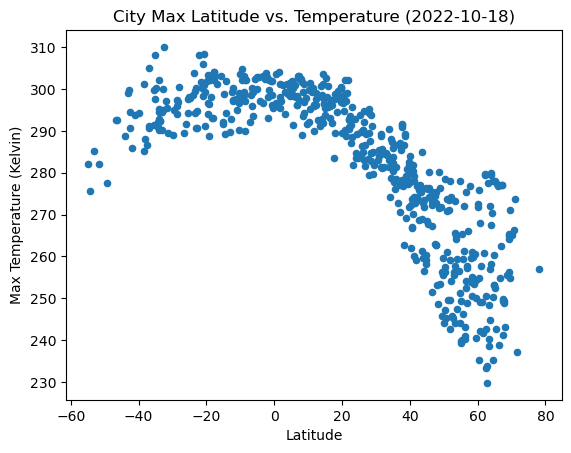

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',
                          y='Max Temp', title='City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

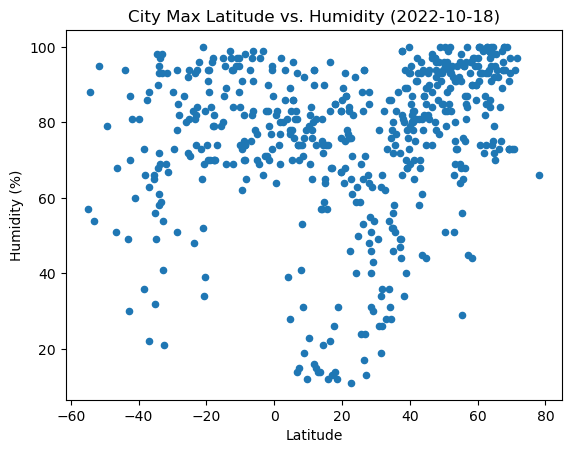

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',
                          y='Humidity', title='City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

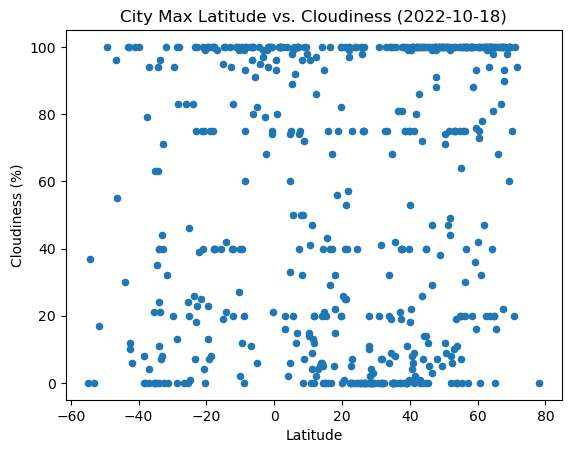

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',
                          y='Cloudiness', title='City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

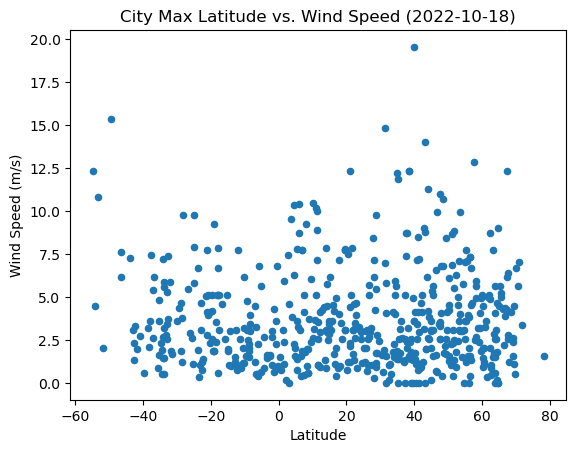

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',
                          y='Wind Speed', title='City Max Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression
#pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(year, petrol_electric_cars)
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # y = slope * x+ intercept
    regress_values = x_values * slope + intercept
    # line_eq = ""
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,248.85,100,93,2.57,RU,1705019778
2,ketchikan,55.3422,-131.6461,265.41,29,0,3.60,US,1705019730
3,iqaluit,63.7506,-68.5145,257.00,84,100,0.00,CA,1705019779
5,tiksi,71.6872,128.8694,237.28,97,94,3.36,RU,1705019780
7,longyearbyen,78.2186,15.6401,257.06,66,0,1.54,SJ,1705019781


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,288.78,94,30,7.25,NZ,1705019778
4,port-aux-francais,-49.3500,70.2167,277.43,79,100,15.36,TF,1705019780
6,adamstown,-25.0660,-130.1015,297.80,81,46,5.83,PN,1705019781
8,grytviken,-54.2811,-36.5092,275.65,88,37,4.46,GS,1705019782
11,sinjai,-5.1241,120.2530,302.78,70,82,0.63,ID,1705019784


###  Temperature vs. Latitude Linear Regression Plot

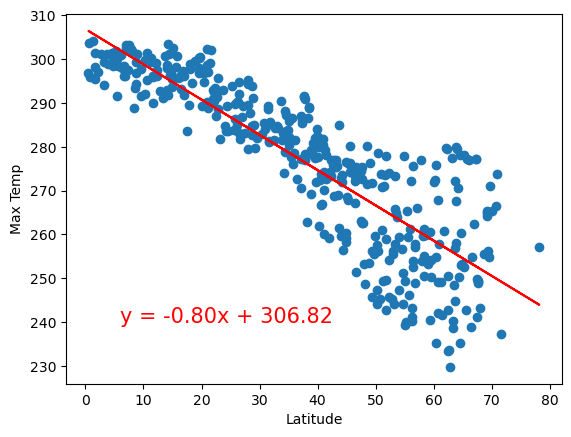

In [35]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (6, 240))

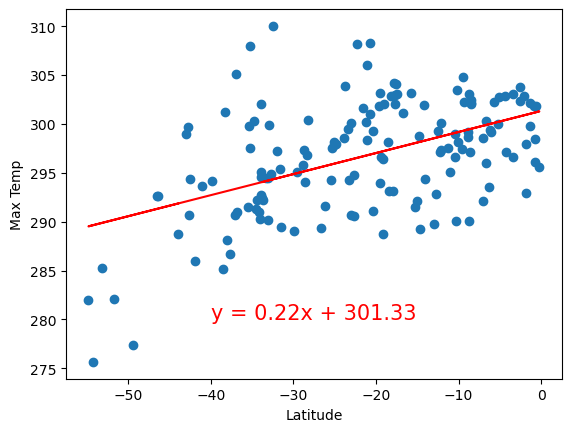

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (-40, 280))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

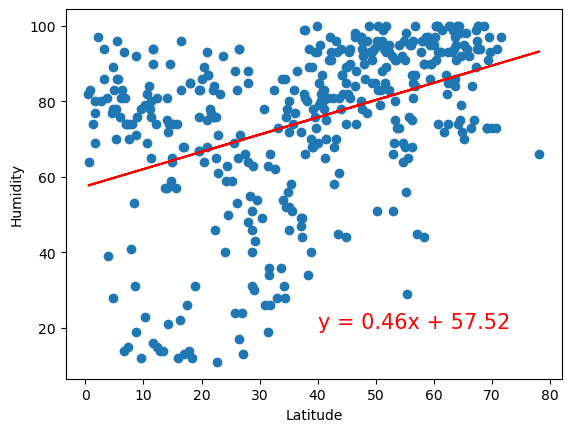

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (40, 20))

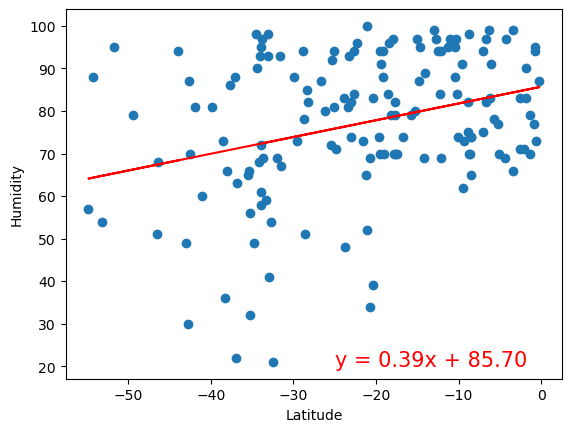

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (-25, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

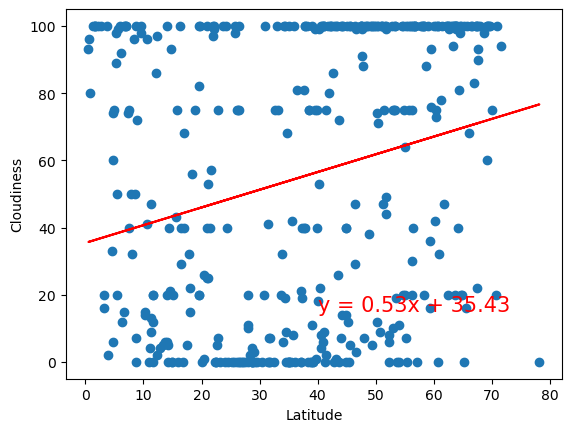

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 15))

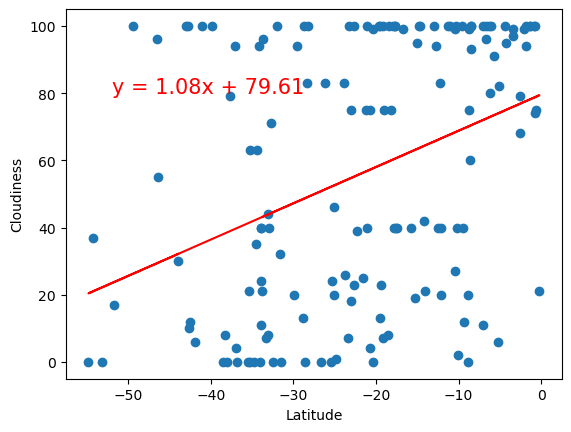

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (-52, 80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

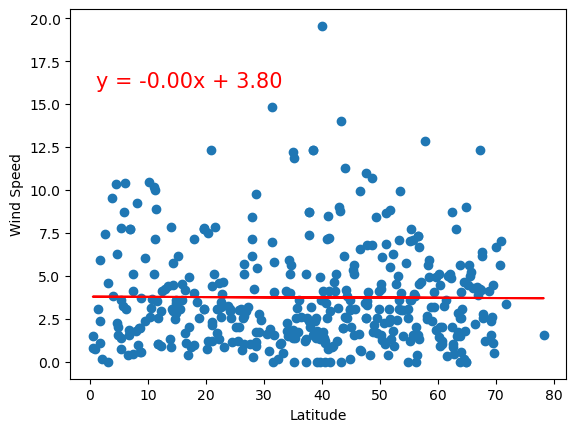

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (1, 16))

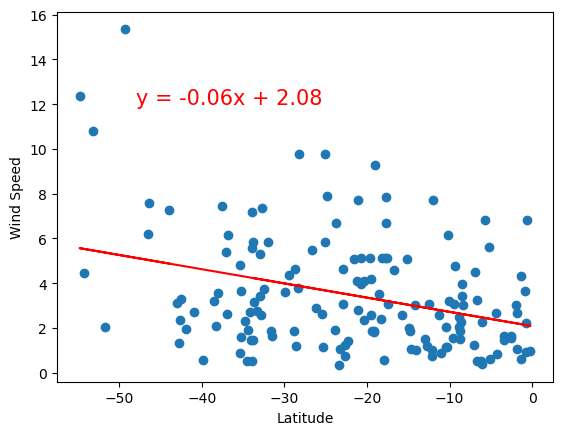

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (-48, 12))